<a href="https://colab.research.google.com/github/masha-nv/llm/blob/main/art_movement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.3/235.3 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 107.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 42.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4

In [2]:
!pip install ddgs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 17.8 MB/s eta 0:00:00


In [6]:
from fastai import *
from fastcore.all import *
from fastai.vision.all import *
from fastdownload import download_url
from ddgs import DDGS

In [23]:
def get_images(keywords, num_max=10):
  out = L(DDGS().images(keywords, num_results=num_max)).itemgot('image')
  return out[0] if len(out) == 1 else out

In [10]:
searches = ['impressionism', 'fauvism', 'cubusim', 'realism']

for o in searches:
  path = Path('art')
  path.mkdir(parents=True, exist_ok=True)
  urls = get_images(o)
  dest = (path/o)
  download_images(dest=dest, urls=urls)

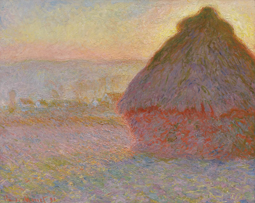

In [27]:
impr = get_images(keywords=searches[0], num_max=1)
download_url(impr, 'test_impt.jpg')
img = Image.open('test_impt.jpg')
img.to_thumb(255, 255)

In [34]:
failed = verify_images(get_image_files(path))
len(failed)
failed.map(Path.unlink)

14

In [35]:
failed = verify_images(get_image_files(path))
len(failed)

0

In [36]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    item_tfms=RandomResizedCrop(255, min_scale=0.2),
    splitter=RandomSplitter(valid_pct=0.2),
    get_y=parent_label,
    get_items=get_image_files
).dataloaders(path, bs=5)

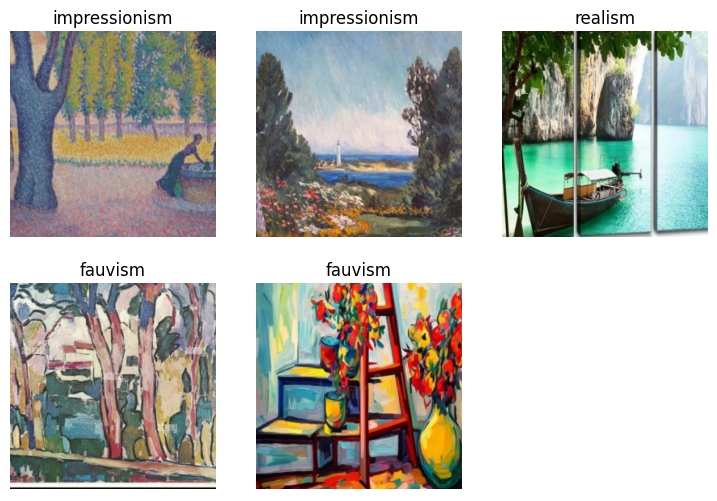

In [39]:
dls.valid.show_batch()

In [37]:
learner = vision_learner(dls, resnet18)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 79.5MB/s]


In [38]:
learner.fine_tune(4)

epoch,train_loss,valid_loss,time
0,1.607346,1.336330,01:19


epoch,train_loss,valid_loss,time
0,1.190835,1.103513,01:53
1,1.111285,0.826222,01:51
2,1.070104,0.900966,01:49
3,0.929284,0.937260,01:57


In [40]:
preds = learner.predict('test_impt.jpg')

In [41]:
preds

('impressionism',
 tensor(2),
 tensor([3.1528e-02, 6.7960e-04, 9.3057e-01, 3.7218e-02]))